In [1]:
fpath="S:/upx-coding/"


In [184]:
#import tsv
import pandas as pd
import numpy as np
fb = pd.read_table(fpath+'pseudo_facebook.tsv')
fb.head(10)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
5,1524765,14,1,1999,12,male,15.0,0,0,0,0,0,0,0,0
6,1136133,13,14,2000,1,male,12.0,0,0,0,0,0,0,0,0
7,1680361,13,4,2000,1,female,0.0,0,0,0,0,0,0,0,0
8,1365174,13,1,2000,1,male,81.0,0,0,0,0,0,0,0,0
9,1712567,13,2,2000,2,male,171.0,0,0,0,0,0,0,0,0


In [3]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


### Dealing with Missing Values

**gender**                   98828 non-null object

**tenure**                   99001 non-null float64


In [185]:
fb[fb['tenure'].isnull()]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
35057,1414063,88,14,1925,12,female,NaN,48,41,18,5,17,3,1,2
63979,2095829,103,1,1910,1,female,NaN,137,52,110,74,0,21,110,53


In [186]:
fb[(fb.age >=88 )&(fb.age <=103 ) & (fb.friend_count >=48)&(fb.friend_count <=137) & (fb.gender =='female')]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
34748,1818602,101,11,1912,12,female,824.0,48,30,1,1,1,1,0,0
34819,2097493,103,1,1910,1,female,594.0,49,7,2,6,2,6,0,0
35031,1915219,99,8,1914,9,female,24.0,49,30,15,19,1,15,14,4
35057,1414063,88,14,1925,12,female,NaN,48,41,18,5,17,3,1,2
35329,1377781,100,28,1913,8,female,555.0,48,8,128,130,128,103,0,27
35389,1135014,102,15,1911,10,female,2261.0,49,14,250,160,112,41,138,119
35665,1502001,95,9,1918,9,female,412.0,51,9,0,0,0,0,0,0
35666,2152739,97,9,1916,6,female,370.0,51,43,0,0,0,0,0,0
35687,1097938,90,2,1923,11,female,359.0,50,34,1,1,0,0,1,1
35799,1048048,100,23,1913,8,female,784.0,51,28,2,24,2,22,0,2


Here now we can replace tenure value with mean of above sample of dataframes with following condition:

age is between(88,103)

frined_count is between(48,137)

gender = female

In [187]:
fb['tenure'][(fb.age >=88 )&(fb.age <=103 ) & (fb.friend_count >=48)&(fb.friend_count <=137) & (fb.gender =='female')].mean()

1024.5056603773585

In [188]:
fb['tenure'].fillna(fb['tenure'][(fb.age >=88 )&(fb.age <=103 ) & (fb.friend_count >=48)&(fb.friend_count <=137) & (fb.gender =='female')].mean(),inplace=True)

In [189]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99003 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


In [137]:
fb.max()

userid                   2193542.0
age                          113.0
dob_day                       31.0
dob_year                    2000.0
dob_month                     12.0
tenure                      3139.0
friend_count                4923.0
friendships_initiated       4144.0
likes                      25111.0
likes_received            261197.0
mobile_likes               25111.0
mobile_likes_received     138561.0
www_likes                  14865.0
www_likes_received        129953.0
dtype: float64

**Hypothesis:** There exist outlier in age

In original data: max(age) is 113

In [190]:
# Computing IQR
Q1 = fb['age'].quantile(0.25)
Q3 = fb['age'].quantile(0.75)
IQR = Q3 - Q1

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
filtered = fb.query('(@Q1 - 1.5 * @IQR) <= age <= (@Q3 + 1.5 * @IQR)')
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94689 entries, 0 to 99002
Data columns (total 15 columns):
userid                   94689 non-null int64
age                      94689 non-null int64
dob_day                  94689 non-null int64
dob_year                 94689 non-null int64
dob_month                94689 non-null int64
gender                   94569 non-null object
tenure                   94689 non-null float64
friend_count             94689 non-null int64
friendships_initiated    94689 non-null int64
likes                    94689 non-null int64
likes_received           94689 non-null int64
mobile_likes             94689 non-null int64
mobile_likes_received    94689 non-null int64
www_likes                94689 non-null int64
www_likes_received       94689 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.6+ MB


In [192]:
filtered.max()

userid                   2193542.0
age                           95.0
dob_day                       31.0
dob_year                    2000.0
dob_month                     12.0
tenure                      2697.0
friend_count                4917.0
friendships_initiated       4144.0
likes                      25111.0
likes_received            261197.0
mobile_likes               25111.0
mobile_likes_received     138561.0
www_likes                  14865.0
www_likes_received        129953.0
dtype: float64

NOTE: Hypothes is true as max(age) is 95 after finding outliers

In [193]:
filtered

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
5,1524765,14,1,1999,12,male,15.0,0,0,0,0,0,0,0,0
6,1136133,13,14,2000,1,male,12.0,0,0,0,0,0,0,0,0
7,1680361,13,4,2000,1,female,0.0,0,0,0,0,0,0,0,0
8,1365174,13,1,2000,1,male,81.0,0,0,0,0,0,0,0,0
9,1712567,13,2,2000,2,male,171.0,0,0,0,0,0,0,0,0


In [194]:
temp_df=filtered[filtered['gender'].isnull()]
temp_df

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
3224,1781137,25,3,1988,1,NaN,203.0,1,1,1,0,1,0,0,0
4123,1110111,31,12,1982,1,NaN,227.0,2,2,0,0,0,0,0,0
5920,2000185,25,15,1988,2,NaN,239.0,4,4,0,0,0,0,0,0
6432,1137054,59,18,1954,2,NaN,2076.0,4,0,23,5,23,4,0,1
6870,1783336,62,5,1951,9,NaN,2047.0,5,0,0,1,0,1,0,0
6886,1280036,67,2,1946,7,NaN,2056.0,5,2,0,0,0,0,0,0
7242,1117499,90,2,1923,11,NaN,1960.0,5,4,33,12,2,0,31,12
7555,1098347,27,19,1986,4,NaN,1150.0,7,2,0,0,0,0,0,0
10093,1020617,85,7,1928,8,NaN,2222.0,9,1,1,1,0,0,1,1
10238,1388497,70,18,1943,11,NaN,2009.0,9,4,2,1,0,0,2,1


There are 120 person with no gender details so their gender could be replaced with mode(gender) but mean(age) i.e. having similar age.  

In [195]:
minAge=temp_df.age.min()
maxAge=temp_df.age.max()
minFc=temp_df.friend_count.min()
maxFc=temp_df.friend_count.max()
print(minAge,maxAge,minFc,maxFc)

15 95 1 1609


In [196]:
filtered['gender'][(filtered.age >=15) & (filtered.age <=95) & (filtered.friend_count <=1609)].mode()

0    male
dtype: object

In [201]:
filtered['gender'].mode()

0    male
dtype: object

Acoording above analysis we could replace missing gender data with **male**

In [205]:
filtered['gender'].fillna(filtered['gender'].mode())
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94689 entries, 0 to 99002
Data columns (total 15 columns):
userid                   94689 non-null int64
age                      94689 non-null int64
dob_day                  94689 non-null int64
dob_year                 94689 non-null int64
dob_month                94689 non-null int64
gender                   94689 non-null object
tenure                   94689 non-null float64
friend_count             94689 non-null int64
friendships_initiated    94689 non-null int64
likes                    94689 non-null int64
likes_received           94689 non-null int64
mobile_likes             94689 non-null int64
mobile_likes_received    94689 non-null int64
www_likes                94689 non-null int64
www_likes_received       94689 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 14.1+ MB


# Date of Birth Analysis

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

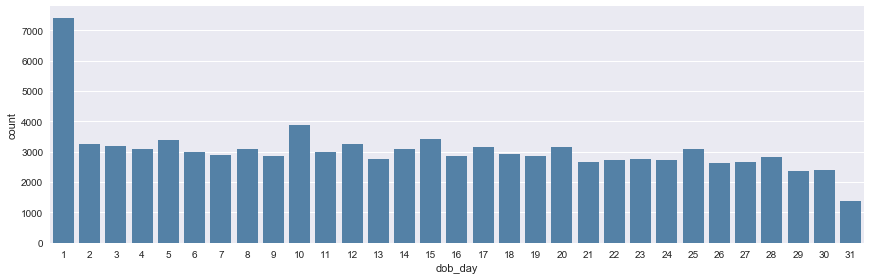

In [206]:
sns.factorplot("dob_day", data=filtered, aspect=3,kind="count", color='steelblue')


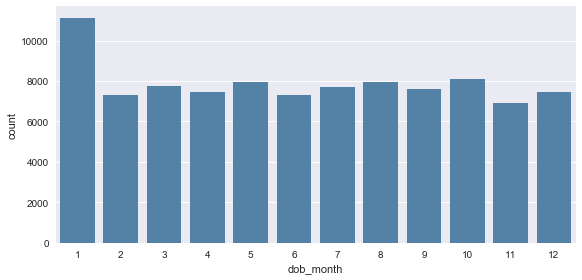

In [207]:
sns.factorplot("dob_month", data=filtered, aspect=2,kind="count", color='steelblue')

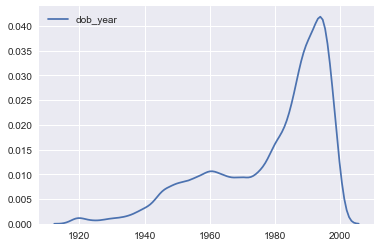

In [208]:
sns.kdeplot(filtered['dob_year'])

In [209]:
#dob= fb.iloc[:,[2,4,3]]
DOB=pd.to_datetime((filtered.dob_year*10000+filtered.dob_month*100+filtered.dob_day).apply(str),format='%Y%m%d')
DOB = pd.DataFrame({'dob':DOB.values})
DOB.head(10)

,dob
0,1999-11-19
1,1999-11-02
2,1999-11-16
3,1999-12-25
4,1999-12-04
5,1999-12-01
6,2000-01-14
7,2000-01-04
8,2000-01-01
9,2000-02-02


In [210]:
dob_count=DOB.dob.value_counts()
dob_count=pd.DataFrame(dob_count)
dob_count

,dob
1988-01-01,656
1987-01-01,393
1990-01-01,313
1995-01-01,168
1980-01-01,164
1994-01-01,149
1991-01-01,138
1992-01-01,120
1985-01-01,118
1993-01-01,112


In [211]:
dob_count.dob.value_counts()

1      4837
2      4080
3      3027
4      2358
5      1611
6      1208
7       925
8       713
9       577
10      466
11      357
12      275
13      215
14      196
15      146
16       98
17       67
18       54
20       35
19       34
24       18
21       17
23       17
22       12
25        8
27        6
28        6
29        4
30        4
39        3
34        3
32        2
67        2
48        1
96        1
112       1
656       1
51        1
45        1
33        1
65        1
66        1
59        1
72        1
120       1
83        1
138       1
42        1
36        1
52        1
164       1
26        1
393       1
53        1
149       1
313       1
31        1
118       1
168       1
47        1
Name: dob, dtype: int64

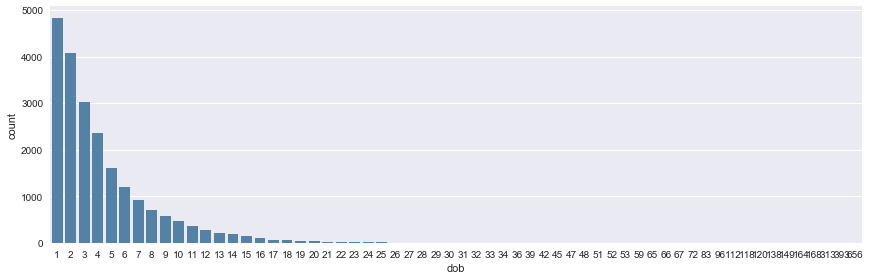

In [212]:
sns.factorplot("dob", data=dob_count, aspect=3, kind="count", color='steelblue')

**Analysis of above graph:** There are 4837 persons having unique DOB and are more in numbers. Also there are 656 person having same DOB


# Friend count analysis

In [213]:
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94689 entries, 0 to 99002
Data columns (total 15 columns):
userid                   94689 non-null int64
age                      94689 non-null int64
dob_day                  94689 non-null int64
dob_year                 94689 non-null int64
dob_month                94689 non-null int64
gender                   94689 non-null object
tenure                   94689 non-null float64
friend_count             94689 non-null int64
friendships_initiated    94689 non-null int64
likes                    94689 non-null int64
likes_received           94689 non-null int64
mobile_likes             94689 non-null int64
mobile_likes_received    94689 non-null int64
www_likes                94689 non-null int64
www_likes_received       94689 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 14.1+ MB


### Gender wise friends count 

In [215]:
m=filtered.gender.value_counts()['male']
f=filtered.gender.value_counts()['female']
print('Male = ',m,'\n')
print('Male = ',f,'\n')
print('Total= ',filtered.count()['gender'],'\n')
filtered.count()['gender']==m+f
#fb.word.value_counts()['gender']

Male =  56131 

Male =  38558 

Total=  94689 



True

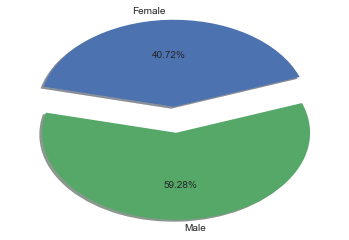

In [216]:
import matplotlib.pyplot as plt
%matplotlib inline
labels = 'Female', 'Male'
sizes = [f,m]
explode = (0.1, 0.2)  

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=20)

plt.show()

Now the data should be distrubuted according to **age groups**:
    
group     age    

1         child (0–15)

2         teenager (16-19)

3         young-adult (20–30)

4         adult(31–50)

5         senior-adult (51-64) 

6         old (>64)

In [269]:
# Adding new column "age_group" according to above classification
age_group=[]
for age in filtered['age']:
    if age > 64:
        age_group.append('old')
    elif age>50:
        age_group.append('senior-adult')
    elif age>30:
        age_group.append('adult')
    elif age>19:
        age_group.append('young-adult')
    elif age>15:
        age_group.append('teenager')
    else:
        age_group.append('child')

In [270]:
filtered['age_group'] = age_group
filtered.info()
# for droping the column use: 
#filtered = filtered.drop('age_group', 1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 94689 entries, 0 to 99002
Data columns (total 16 columns):
userid                   94689 non-null int64
age                      94689 non-null int64
dob_day                  94689 non-null int64
dob_year                 94689 non-null int64
dob_month                94689 non-null int64
gender                   94689 non-null object
tenure                   94689 non-null float64
friend_count             94689 non-null int64
friendships_initiated    94689 non-null int64
likes                    94689 non-null int64
likes_received           94689 non-null int64
mobile_likes             94689 non-null int64
mobile_likes_received    94689 non-null int64
www_likes                94689 non-null int64
www_likes_received       94689 non-null int64
age_group                94689 non-null object
dtypes: float64(1), int64(13), object(2)
memory usage: 14.8+ MB


In [271]:
filtered['age'].max()
#filtered.iloc[:,[1,15]]

95

In [272]:
age_count=filtered.age_group.value_counts()
age_count=pd.DataFrame(age_count)
age_count

,age_group
young-adult,32415
adult,21459
teenager,15956
senior-adult,12503
old,7329
child,5027


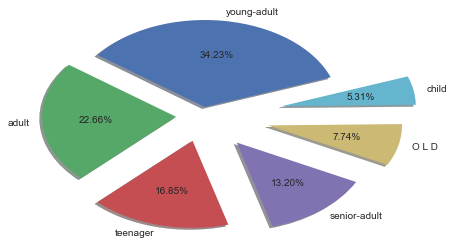

In [286]:
labels = 'young-adult','adult','teenager','senior-adult','O L D','child'

sizes = filtered.age_group.value_counts()
explode = (0.1, 0.2,0.3,0.4,0.5,0.6)  

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',shadow=True, startangle=20)

plt.show()

In [ ]:
labels = 'young-adult','adult','teenager','senior-adult','O L D','child'

sizes = filtered.age_group.value_counts()
explode = (0.1, 0.2,0.3,0.4,0.5,0.6)  

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',shadow=True, startangle=20)

plt.show()

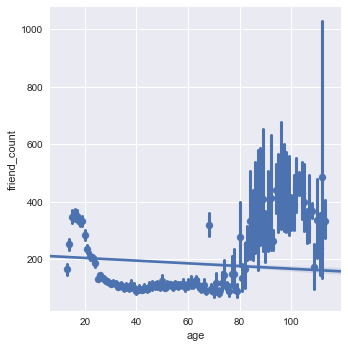

In [19]:
sns.lmplot(x="age", y="friend_count", data=fb, x_estimator=np.mean)

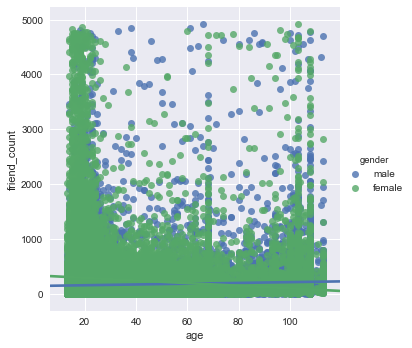

In [20]:
sns.lmplot(x="age", y="friend_count", hue="gender", data=fb)

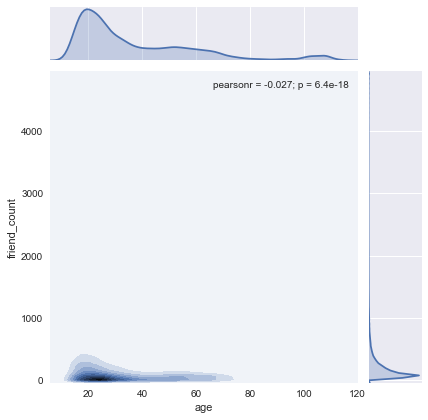

In [22]:
sns.jointplot(x="age", y="friend_count", data=fb, kind="kde")